<a href="https://colab.research.google.com/github/dote7ant/Dimension_reduction_fSelection_anomalies_rules_analysis/blob/master/Dimensionality_reduction_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dimension reduction and Feature selection.

## Introduction

### a. Defining the question.

1. Reduce your dataset to a low dimensional dataset using the t-SNE algorithm or PCA. You will be required to perform your analysis and provide insights gained from your analysis.
2. Perform feature selection through the use of the unsupervised learning methods. You will be required to perform your analysis and provide insights on the features that contribute the most information to the dataset.

### b. Defining the metrics of success.

For this project to be successful we should aim to do the following:

1. Clean the data.
2. Find how other variables interact with each other. 
3. Determine which variables are most important.
4. Reduce the data dimensions.
5. Find most important features.

### c. Understanding the context.





You are a Data analyst at Carrefour Kenya and are currently undertaking a project that will inform the marketing department on the most relevant marketing strategies that will result in the highest no. of sales (total price including tax). 

### d. Recording the Experimental design.

The following are the steps that we will take to conduct this project. They are listed below:


1. Loading the required libraries.
2. Loading the data set.
3. Check the data.
4. Data preparation.
5. Validate the data.
6. Performing Exploratory Data Analysis (EDA).
7. Dimensionality reduction.
8. Feature selection.
9. Draw conclusions.
10. Make recommendations.
11. Follow up questions.



## 1. Reading the data and importing the required libraries.

In [ ]:
# install tidyverse which has a collection of packages we will use 
install.packages("tidyverse")
require(tidyverse)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
# install data explorer
# we will use this to add visuals to our checking of data
install.packages('DataExplorer') 
library(DataExplorer)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘igraph’, ‘data.table’, ‘reshape2’, ‘gridExtra’, ‘networkD3’




In [ ]:
# install the grid extra package
library(grid)
install.packages("gridExtra")
require(gridExtra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: gridExtra


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [ ]:
# install corrplot to plot a correlation visualization
install.packages("corrplot")
require(corrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: corrplot

corrplot 0.84 loaded



In [ ]:
# install fbasics to calculate the skewness and kurtosis of the data set
install.packages("fBasics")
require(fBasics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘timeDate’, ‘timeSeries’, ‘gss’, ‘stabledist’


Loading required package: fBasics

Loading required package: timeDate

Loading required package: timeSeries



In [ ]:
# install package to encode categorical columns
install.packages("CatEncoders")
require(CatEncoders)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: CatEncoders


Attaching package: ‘CatEncoders’


The following object is masked from ‘package:base’:

    transform




In [ ]:
# install the caret package
install.packages("caret")
require(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’


Loading required package: caret

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
# load the data set 
url = "http://bit.ly/CarreFourDataset"
df <- read.csv(url)

# preview the data set 
head(df)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785
6,699-14-3026,C,Normal,Male,Electronic accessories,85.39,7,29.8865,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1,627.6165


## 2. Check the data.

In [ ]:
# find the first 5 rows
head(df, 5)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,750-67-8428,A,Member,Female,Health and beauty,74.69,7,26.1415,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,548.9715
2,226-31-3081,C,Normal,Female,Electronic accessories,15.28,5,3.8200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,80.2200
3,631-41-3108,A,Normal,Male,Home and lifestyle,46.33,7,16.2155,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,340.5255
4,123-19-1176,A,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,489.0480
5,373-73-7910,A,Normal,Male,Sports and travel,86.31,7,30.2085,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,634.3785


In [ ]:
# check the last 5 rows
tail(df, 5)

,Invoice.ID,Branch,Customer.type,Gender,Product.line,Unit.price,Quantity,Tax,Date,Time,Payment,cogs,gross.margin.percentage,gross.income,Rating,Total
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<dbl>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
996,233-67-5758,C,Normal,Male,Health and beauty,40.35,1,2.0175,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,42.3675
997,303-96-2227,B,Normal,Female,Home and lifestyle,97.38,10,48.6900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,1022.4900
998,727-02-1313,A,Member,Male,Food and beverages,31.84,1,1.5920,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,33.4320
999,347-56-2442,A,Normal,Male,Home and lifestyle,65.82,1,3.2910,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,69.1110
1000,849-09-3807,A,Member,Female,Fashion accessories,88.34,7,30.9190,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,649.2990


From the tail and head we can see different branches of carrefour, the customer type, product category, type of payment and total amount paid. We do also observe the data and time.

In [ ]:
# find the column names
print(names(df))

 [1] "Invoice.ID"              "Branch"                 
 [3] "Customer.type"           "Gender"                 
 [5] "Product.line"            "Unit.price"             
 [7] "Quantity"                "Tax"                    
 [9] "Date"                    "Time"                   
[11] "Payment"                 "cogs"                   
[13] "gross.margin.percentage" "gross.income"           
[15] "Rating"                  "Total"                  


We will want to convert the names to lower case and add an underscore where necessary.

In [ ]:
# check type of data set
class(df)

[1] "data.frame"

In [ ]:
# find the column data types 
str(df)

'data.frame':	1000 obs. of  16 variables:
 $ Invoice.ID             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ Branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ Customer.type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ Gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ Product.line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ Unit.price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ Quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ Tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ Date                   : Factor w/ 89 levels "1/1/2019","1/10/2019",..: 27 88 82 20 58 77 49 48 2 44 ...
 $ Time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ Payment                : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3

We observe that there are 8 columns that are factors, the remaing 8 are numerical columns.

We will want to convert the date and time columns to the appropriate data type. The invoice ID should also be converted to the appropriate data type.

In [ ]:
# find out how many rows and columns are present in the data set
dim(df)

[1] 1000   16

There are 1000 rows and 10 columns

In [ ]:
# check if there are any duplicates
anyDuplicated(df)

[1] 0

There are no duplicate values

In [ ]:
# check if there are any missing values
colSums(is.na(df))

Invoice.ID                  Branch           Customer.type 
                      0                       0                       0 
                 Gender            Product.line              Unit.price 
                      0                       0                       0 
               Quantity                     Tax                    Date 
                      0                       0                       0 
                   Time                 Payment                    cogs 
                      0                       0                       0 
gross.margin.percentage            gross.income                  Rating 
                      0                       0                       0 
                  Total 
                      0

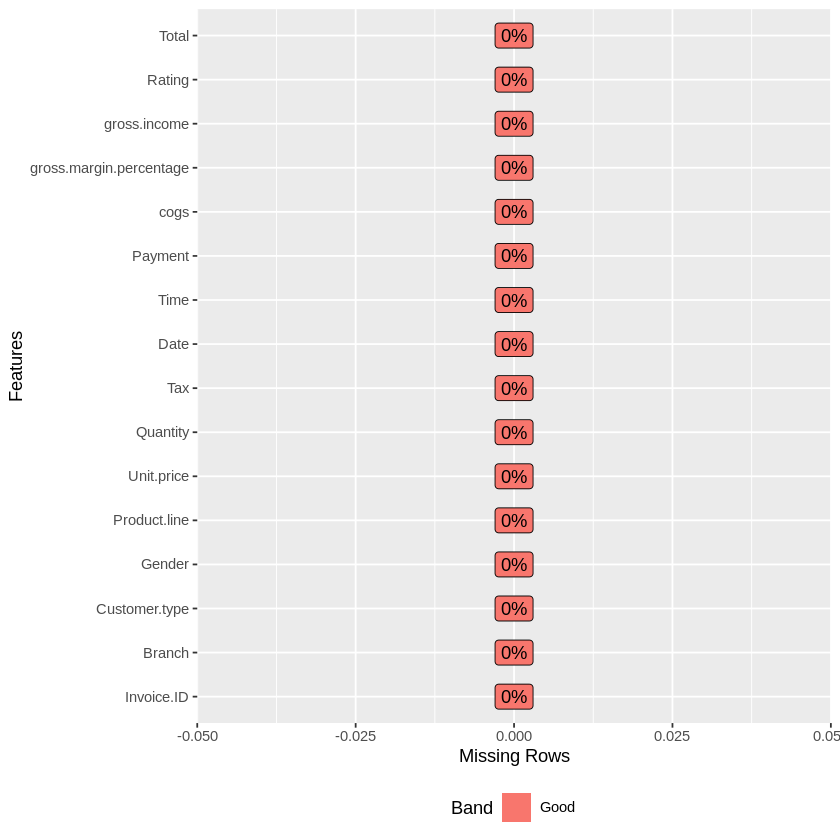

In [ ]:
# a visualization to show percentage of missing values in our data set
plot_missing(df)

No missing values

### Frequencies

In [ ]:
# frequency of gender
gen <- table(df$Gender)
gen


Female   Male 
   501    499 

There are slightly more females than males in the dataset.

In [ ]:
# frequency of invoice ids
invo <- table(df$Invoice.ID)
dim(invo)

[1] 1000

In [ ]:
# frequency of payment methods
pay <- table(df$Payment)
pay


       Cash Credit card     Ewallet 
        344         311         345 

More people paid with ewallet. Followed closely by cash and finally credit card.

In [ ]:
# frequency of  customer type
cust  <- table(df$Customer.type)
cust


Member Normal 
   501    499 

In [ ]:
# frequency of branches
branch <- table(df$Branch)
branch


  A   B   C 
340 332 328 

In [ ]:
# frequency of product category
prod <- table(df$Product.line)
prod


Electronic accessories    Fashion accessories     Food and beverages 
                   170                    178                    174 
     Health and beauty     Home and lifestyle      Sports and travel 
                   152                    160                    166 

## 3. Tidying up the data.

In [ ]:
# change column names to lower case 
colnames(df) <- tolower(colnames(df))
# check to see if the change is successful
colnames(df)

[1] "invoice.id"              "branch"                 
 [3] "customer.type"           "gender"                 
 [5] "product.line"            "unit.price"             
 [7] "quantity"                "tax"                    
 [9] "date"                    "time"                   
[11] "payment"                 "cogs"                   
[13] "gross.margin.percentage" "gross.income"           
[15] "rating"                  "total"

In [ ]:
# rename the columns to appropriate ones
df <- rename(df, invoice_id = invoice.id, customer_type = customer.type,  product_line = product.line, unit_price = unit.price,
payment_type = payment, gross_margin_percentage = gross.margin.percentage, gross_income = gross.income)

In [ ]:
# confirm
print(names(df))

 [1] "invoice_id"              "branch"                 
 [3] "customer_type"           "gender"                 
 [5] "product_line"            "unit_price"             
 [7] "quantity"                "tax"                    
 [9] "date"                    "time"                   
[11] "payment_type"            "cogs"                   
[13] "gross_margin_percentage" "gross_income"           
[15] "rating"                  "total"                  


In [ ]:
# make copy 
# make a copy of df_n
datee <- cbind(df)
dim(datee)
# change date column to date type
datee$date <- as.Date(datee$date)
str(datee)

[1] 1000   16

'data.frame':	1000 obs. of  16 variables:
 $ invoice_id             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ customer_type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ product_line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ unit_price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ date                   : Date, format: "1-05-20" "3-08-20" ...
 $ time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ payment_type           : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   :

In [ ]:
# check if there are any missing values
colSums(is.na(datee))

invoice_id                  branch           customer_type 
                      0                       0                       0 
                 gender            product_line              unit_price 
                      0                       0                       0 
               quantity                     tax                    date 
                      0                       0                     587 
                   time            payment_type                    cogs 
                      0                       0                       0 
gross_margin_percentage            gross_income                  rating 
                      0                       0                       0 
                  total 
                      0

Having converted the date column to date type we observe that we have created 587 null values so we will revert back to the old format.

### Checking for outliers

In [ ]:
# retrieve numerical columns 
data <- select_if(df, is.numeric)             # Subset numeric columns with dplyr
head(data)

,unit_price,quantity,tax,cogs,gross_margin_percentage,gross_income,rating,total
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,74.69,7,26.1415,522.83,4.761905,26.1415,9.1,548.9715
2,15.28,5,3.8200,76.40,4.761905,3.8200,9.6,80.2200
3,46.33,7,16.2155,324.31,4.761905,16.2155,7.4,340.5255
4,58.22,8,23.2880,465.76,4.761905,23.2880,8.4,489.0480
5,86.31,7,30.2085,604.17,4.761905,30.2085,5.3,634.3785
6,85.39,7,29.8865,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
boxplot.stats(data$unit_price)

$stats
[1] 10.08 32.85 55.23 77.94 99.96

$n
[1] 1000

$conf
[1] 52.97712 57.48288

$out
numeric(0)

In [ ]:
boxplot.stats(data$quantity)

$stats
[1]  1  3  5  8 10

$n
[1] 1000

$conf
[1] 4.75018 5.24982

$out
integer(0)

In [ ]:
boxplot.stats(data$tax)

$stats
[1]  0.50850  5.89475 12.08800 22.46050 45.32500

$n
[1] 1000

$conf
[1] 11.26031 12.91569

$out
[1] 47.790 49.490 49.650 47.720 48.605 49.260 48.750 48.685 48.690

In [ ]:
boxplot.stats(data$cogs)

$stats
[1]  10.170 117.895 241.760 449.210 906.500

$n
[1] 1000

$conf
[1] 225.2062 258.3138

$out
[1] 955.8 989.8 993.0 954.4 972.1 985.2 975.0 973.7 973.8

In [ ]:
boxplot.stats(data$gross_margin_percentage)

$stats
[1] 4.761905 4.761905 4.761905 4.761905 4.761905

$n
[1] 1000

$conf
[1] 4.761905 4.761905

$out
numeric(0)

In [ ]:
boxplot.stats(data$gross_income)

$stats
[1]  0.50850  5.89475 12.08800 22.46050 45.32500

$n
[1] 1000

$conf
[1] 11.26031 12.91569

$out
[1] 47.790 49.490 49.650 47.720 48.605 49.260 48.750 48.685 48.690

In [ ]:
boxplot.stats(data$rating)

$stats
[1]  4.0  5.5  7.0  8.5 10.0

$n
[1] 1000

$conf
[1] 6.850108 7.149892

$out
numeric(0)

In [ ]:
boxplot.stats(data$total)

$stats
[1]  10.6785 123.7897 253.8480 471.6705 951.8250

$n
[1] 1000

$conf
[1] 236.4665 271.2295

$out
[1] 1003.590 1039.290 1042.650 1002.120 1020.705 1034.460 1023.750 1022.385
[9] 1022.490

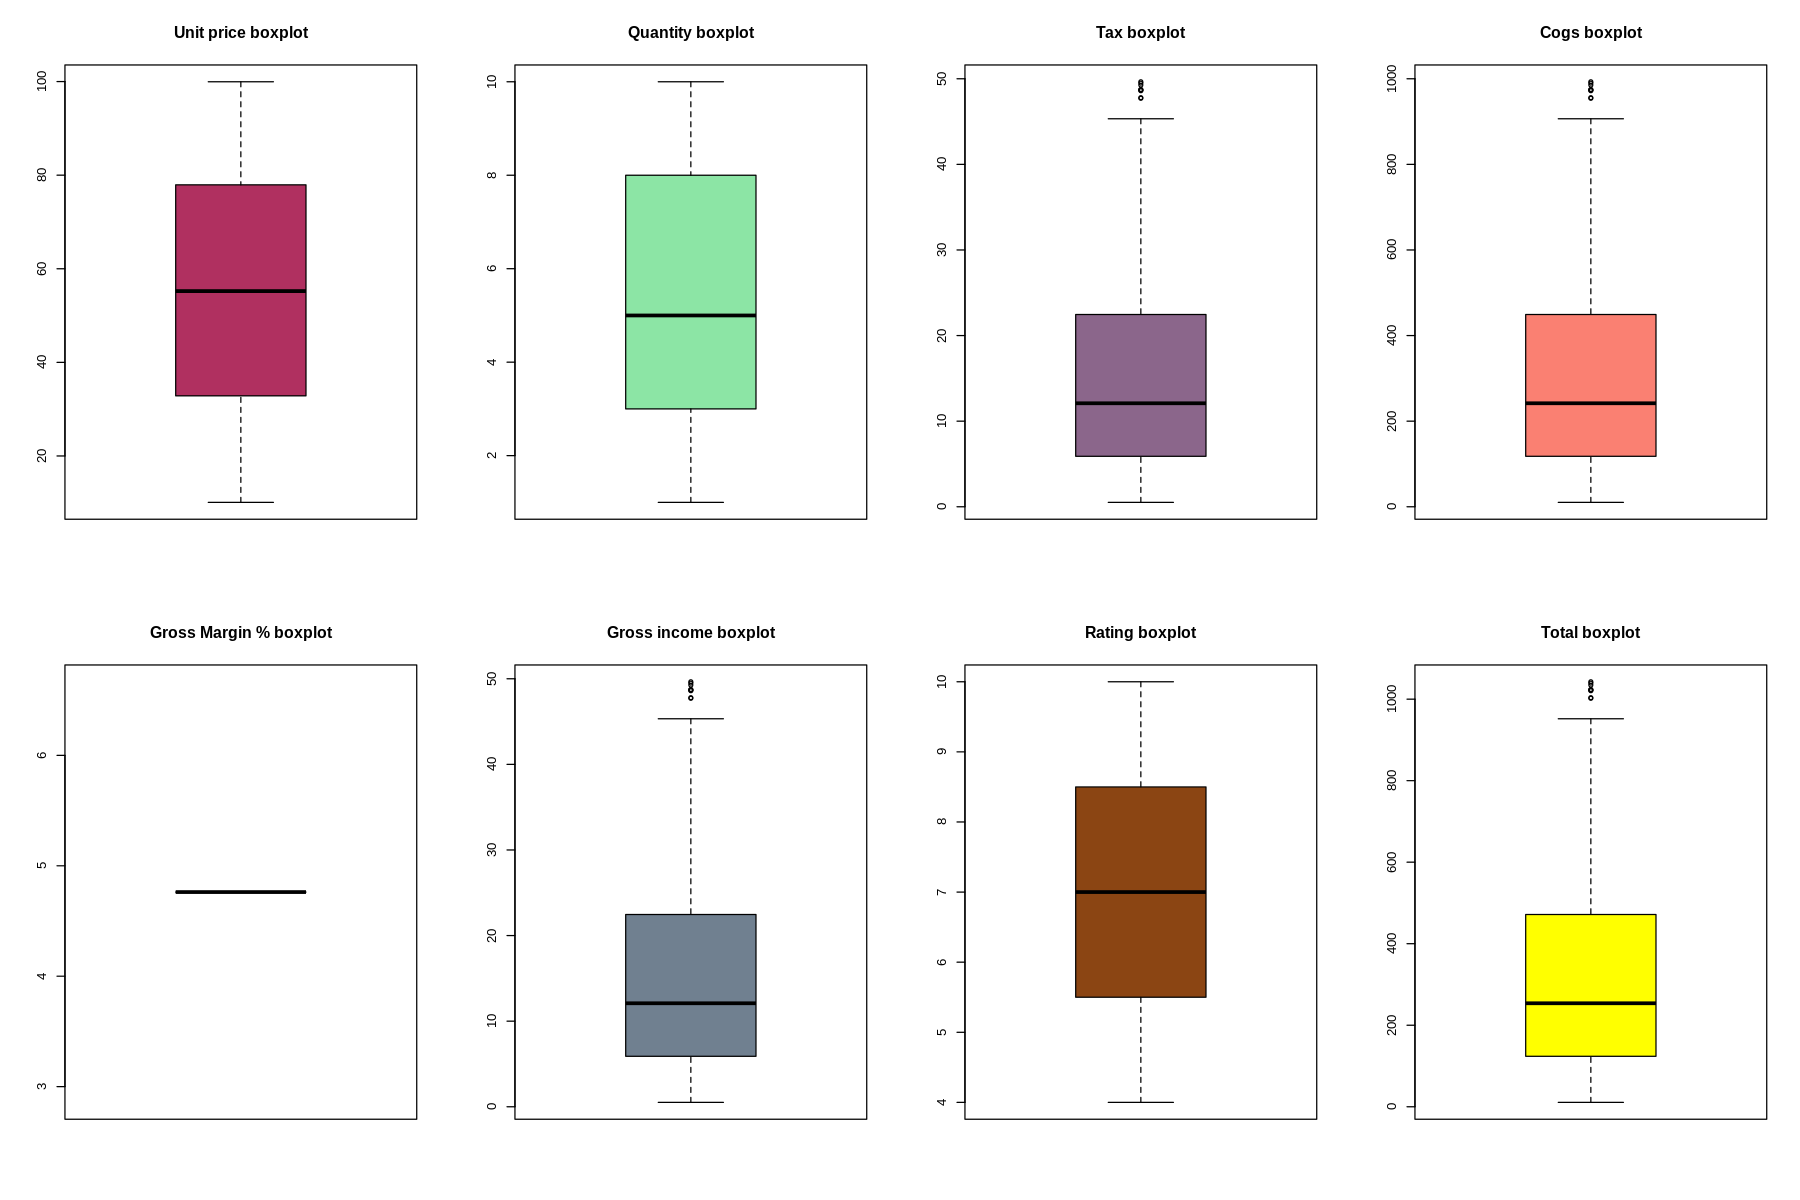

In [ ]:
# outlier information of the unit_price 
par(mfrow = c(2,4))
options(repr.plot.width=15, repr.plot.height=10)
boxplot(data$unit_price, col="maroon",  main = "Unit price boxplot")
boxplot(data$quantity, col=rgb(0.1,0.8,0.3,0.5),  main = "Quantity boxplot")
boxplot(data$tax, col="plum4",  main = "Tax boxplot")
boxplot(data$cogs, col="salmon",  main = "Cogs boxplot")
boxplot(data$gross_margin_percentage, col="tan4",  main = "Gross Margin % boxplot")
boxplot(data$gross_income, col="slategray",  main = "Gross income boxplot")
boxplot(data$rating, col="saddlebrown",  main = "Rating boxplot")
boxplot(data$total, col="yellow",  main = "Total boxplot")

## 4. Exploratory Data Analysis (EDA).

In [ ]:
# make a copy of df_n
eda <- cbind(df)
dim(eda)

[1] 1000   16

### a. Univariate analysis

In [ ]:
# get the summary statistics
summary(eda)

       invoice_id  branch  customer_type    gender   
 101-17-6199:  1   A:340   Member:501    Female:501  
 101-81-4070:  1   B:332   Normal:499    Male  :499  
 102-06-2002:  1   C:328                             
 102-77-2261:  1                                     
 105-10-6182:  1                                     
 105-31-1824:  1                                     
 (Other)    :994                                     
                 product_line   unit_price       quantity          tax         
 Electronic accessories:170   Min.   :10.08   Min.   : 1.00   Min.   : 0.5085  
 Fashion accessories   :178   1st Qu.:32.88   1st Qu.: 3.00   1st Qu.: 5.9249  
 Food and beverages    :174   Median :55.23   Median : 5.00   Median :12.0880  
 Health and beauty     :152   Mean   :55.67   Mean   : 5.51   Mean   :15.3794  
 Home and lifestyle    :160   3rd Qu.:77.94   3rd Qu.: 8.00   3rd Qu.:22.4453  
 Sports and travel     :166   Max.   :99.96   Max.   :10.00   Max.   :49.6500  
        

Above we can observe the mean, median, first and third quantiles, minimum number and maximum number. The table below shows the data in a more organized format.

In [ ]:
### Mode is the observation that appears most frequently.
# function to get the mode
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [ ]:
number <- names(data)
for (i in number ){
  ad_mode <- getmode(data[, i])
  print("The mode for")
  print(colnames(data[i]))
  print(ad_mode)
}

[1] "The mode for"
[1] "unit_price"
[1] 83.77
[1] "The mode for"
[1] "quantity"
[1] 10
[1] "The mode for"
[1] "tax"
[1] 39.48
[1] "The mode for"
[1] "cogs"
[1] 789.6
[1] "The mode for"
[1] "gross_margin_percentage"
[1] 4.761905
[1] "The mode for"
[1] "gross_income"
[1] 39.48
[1] "The mode for"
[1] "rating"
[1] 6
[1] "The mode for"
[1] "total"
[1] 829.08


The most common advert topic from the mode is the ***cloned 5th generation orchestration***.

The most common City is **Wrightburgh** and most common country is **Tunisia.**

The table below shows the statistical summaries that is the mean, mode, median, min and max value and the first and third quantiles.

Mean is the average of a set of numbers. 

Median is the middle value in an order set of numbers.

Mode is the most frequent observation in a set of data.

|Column|Mean|Median|Mode|Min_value|Max_value|1st_quantile|3rd_quantile|
|------|------|------|------|------|------|------|------|
|Daily time spent on site|65.00|68.22|62.26|32.60|91.43|51.36|78.55|
|Age|36|35|31|19|61|29|42|
|Area Income|55,000|57,012|61,833.9|13,996|79,485|47,032|65,471|
|Daily Internet Usage|180|183.1|167.22|104.8|270|138.8|218.8|
|Gender|0.481|0|0|0|1|0|1|
|Clicked on Ad|0.5|0.5|0 and 1|0|1|0|1|
|Continent|||2||||

#### Variance 

This is the measure of how far a set of numbers are spread out from their average value.

In [ ]:
# find the variance for the unit price
va_price <- var(data$unit_price)
print(va_price)

[1] 701.9653


In [ ]:
# find the variance for the quantity
va_quantity <- var(data$quantity)
print(va_quantity)

[1] 8.546446


In [ ]:
# find the variance for tax
va_tax <- var(data$tax)
print(va_tax)

[1] 137.0966


In [ ]:
# find the variance for cogs
va_cogs <- var(data$cogs)
print(va_cogs)

[1] 54838.64


In [ ]:
# find the variance for gross margin percentage
va_margin <- var(data$gross_margin_percentage)
print(va_margin)

[1] 0


In [ ]:
# find the variance for gross income
va_income <- var(data$gross_income)
print(va_income)

[1] 137.0966


In [ ]:
# find the variance for rating
va_rating <- var(data$rating)
print(va_rating)

[1] 2.953518

In [ ]:
# find the variance for total
va_total <- var(data$total)
print(va_total)

[1] 60459.6


#### Standard Deviation 

This is the square root of the variance.


In [ ]:
# find the standard deviation for the unit price 
std_price <- sd(data$unit_price)
print(std_price)

[1] 26.49463


In [ ]:
# find the standard deviation for the quantity
std_quantity <- sd(data$quantity)
print(std_quantity)

[1] 2.923431


In [ ]:
# find the standard deviation for tax
std_tax <- sd(data$tax)
print(std_tax)

[1] 11.70883


In [ ]:
# find the standard deviation forcogs
std_cogs <- sd(data$cogs)
print(std_cogs)

[1] 234.1765


In [ ]:
# find the standard deviation for gross margin percentage
std_margin <- sd(data$gross_margin_percentage)
print(std_margin)

[1] 0


In [ ]:
# find the standard deviation for gross income
std_income <- sd(data$gross_income)
print(std_income)

[1] 11.70883


In [ ]:
# find the standard deviation for rating
std_rating <- sd(data$rating)
print(std_rating)

[1] 1.71858


In [ ]:
# find the standard deviation for total
std_total <- sd(data$total)
print(std_total)

[1] 245.8853


Since standard deviation is the square root of variance we observe the same ranking as that of variance. 

#### Skewness and Kurtosis 

#####Skewness

Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean.

In [ ]:
# find the skewness of the data
library(fBasics)
print(skewness(data))

             unit_price                quantity                     tax 
            0.007056230             0.012902251             0.889893881 
                   cogs gross_margin_percentage            gross_income 
            0.889893881                     NaN             0.889893881 
                 rating                   total 
            0.008982638             0.889893881 


##### Kurtosis

Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution. In other words, kurtosis identifies whether the tails of a given distribution contain extreme values.

In [ ]:
# find the kurtosis of the data 
print(kurtosis(data))

             unit_price                quantity                     tax 
            -1.22206222             -1.21903927             -0.09329206 
                   cogs gross_margin_percentage            gross_income 
            -0.09329206                     NaN             -0.09329206 
                 rating                   total 
            -1.15552546             -0.09329206 


###  Univariate graphs

#### 1. Histograms

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(fac_cols)` instead of `fac_cols` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



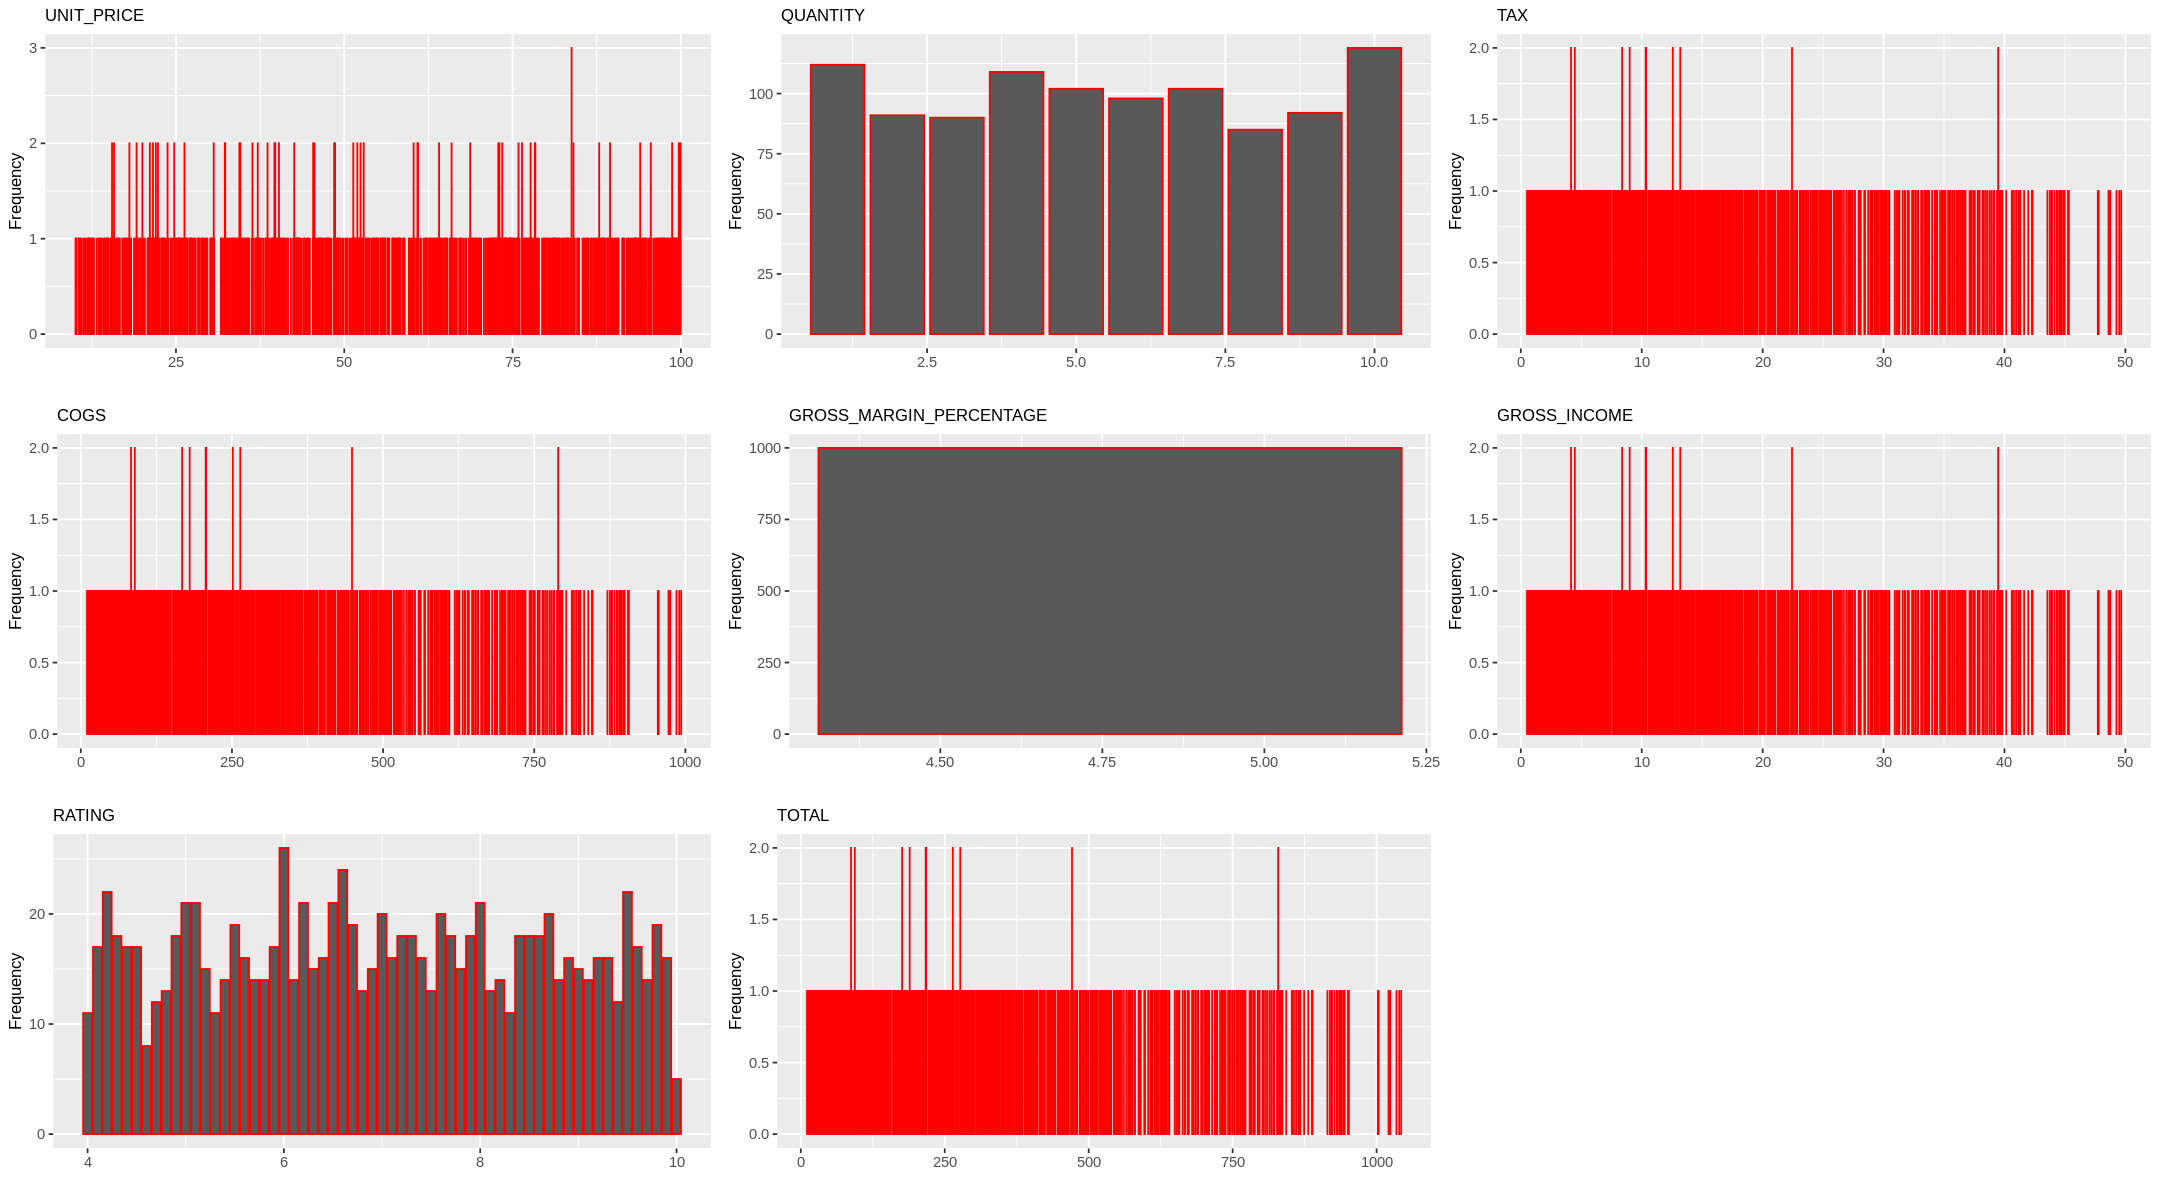

In [ ]:
# Plotting histograms
fac_cols = names(data)
columns = colnames(select(eda, fac_cols))

p = list()
options(repr.plot.width = 18, repr.plot.height = 10)
for (i in 1:8){
  p[[i]] = ggplot(eda, aes_string(columns[i])) + geom_bar(color ="red") + labs(y = 'Frequency', x = '', title = toupper(columns[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p)

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(fac_cols)` instead of `fac_cols` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



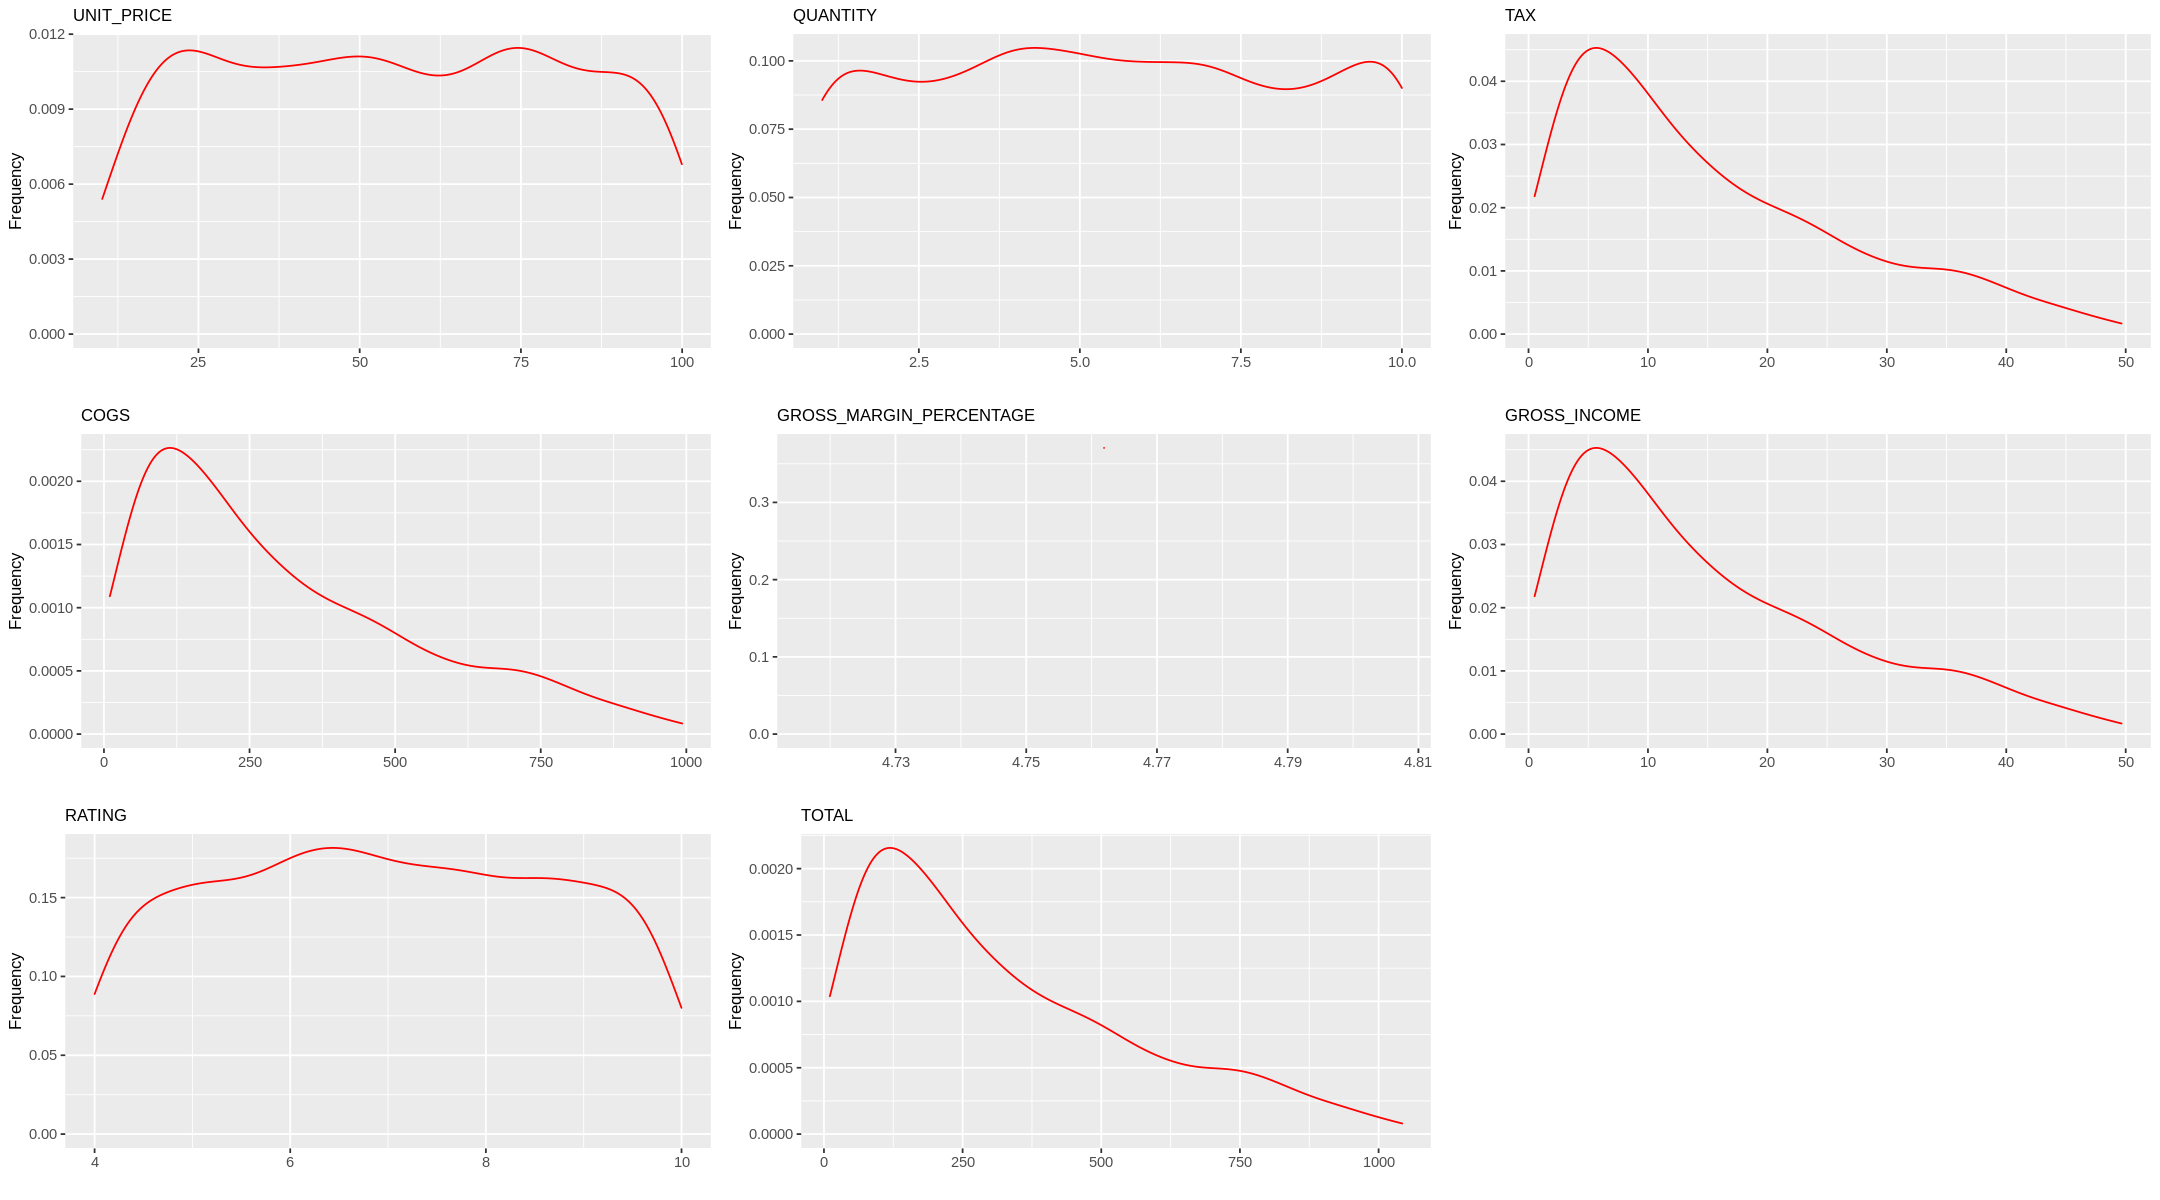

In [ ]:
# plotting line graphs
fac_cols = names(data)
columns = colnames(select(eda, fac_cols))

p = list()
options(repr.plot.width = 18, repr.plot.height = 10)
for (i in 1:8){
  p[[i]] = ggplot(eda, aes_string(columns[i])) + geom_density(color ="red") + labs(y = 'Frequency', x = '', title = toupper(columns[i])) +
  theme(plot.title = element_text(size = 10),
       axis.title.y = element_text(size = 10))
}

do.call(grid.arrange, p)

#### 2. Barplots

### b. Bivariate analysis

#### Correlation

In [ ]:
# create correlation matrix of data
res <- cor(data) 
round(res, 2)

Warning message in cor(data):
“the standard deviation is zero”


,unit_price,quantity,tax,cogs,gross_margin_percentage,gross_income,rating,total
unit_price,1.00,0.01,0.63,0.63,NA,0.63,-0.01,0.63
quantity,0.01,1.00,0.71,0.71,NA,0.71,-0.02,0.71
tax,0.63,0.71,1.00,1.00,NA,1.00,-0.04,1.00
cogs,0.63,0.71,1.00,1.00,NA,1.00,-0.04,1.00
gross_margin_percentage,NA,NA,NA,NA,1,NA,NA,NA
gross_income,0.63,0.71,1.00,1.00,NA,1.00,-0.04,1.00
rating,-0.01,-0.02,-0.04,-0.04,NA,-0.04,1.00,-0.04
total,0.63,0.71,1.00,1.00,NA,1.00,-0.04,1.00


Warning message in cor(data):
“the standard deviation is zero”


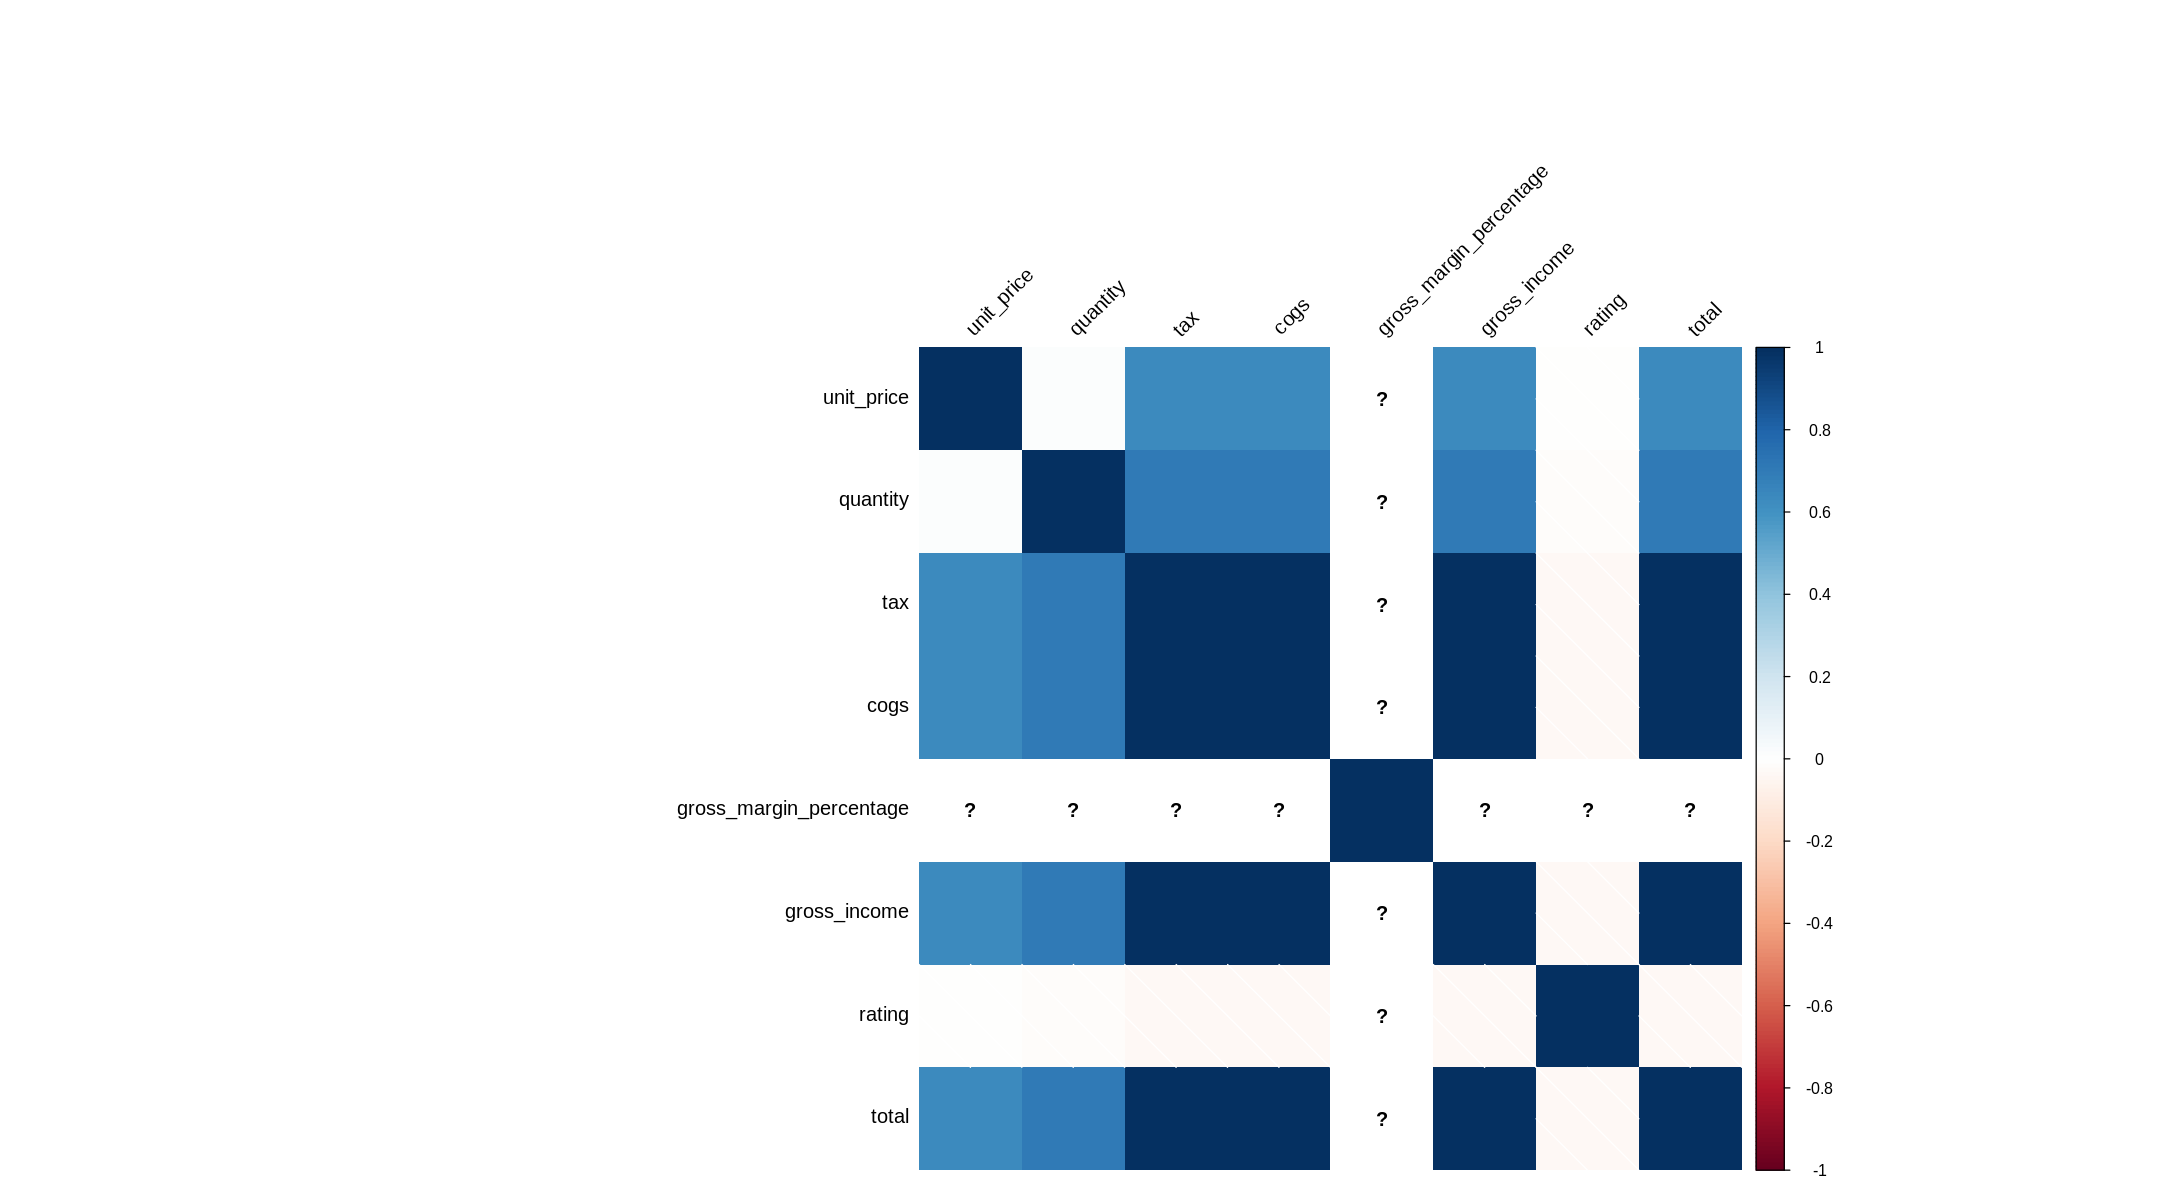

In [ ]:
# correlation matrix visualization
corrplot(cor(data), method="shade", tl.col="black", tl.srt=45)

We observe that the correlation is relatively high. 

### c. Multivariate analysis

## 5. Dimensionality reduction.

Due to the high correlation between the columns the most appropriate algorithm to use is the PCA.

In [ ]:
# get the cat columns in order to use our catencoders package to encode
# make a copy of eda
sol <- cbind(eda)
dim(sol)

sol$date <- as.Date(sol$date)


[1] 1000   16

In [ ]:
# get structure of new copy
str(sol)

'data.frame':	1000 obs. of  16 variables:
 $ invoice_id             : Factor w/ 1000 levels "101-17-6199",..: 815 143 654 19 340 734 316 265 703 727 ...
 $ branch                 : Factor w/ 3 levels "A","B","C": 1 3 1 1 1 3 1 3 1 2 ...
 $ customer_type          : Factor w/ 2 levels "Member","Normal": 1 2 2 1 2 2 1 2 1 1 ...
 $ gender                 : Factor w/ 2 levels "Female","Male": 1 1 2 2 2 2 1 1 1 1 ...
 $ product_line           : Factor w/ 6 levels "Electronic accessories",..: 4 1 5 4 6 1 1 5 4 3 ...
 $ unit_price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ date                   : Date, format: "1-05-20" "3-08-20" ...
 $ time                   : Factor w/ 506 levels "10:00","10:01",..: 147 24 156 486 30 394 215 78 342 160 ...
 $ payment_type           : Factor w/ 3 levels "Cash","Credit card",..: 3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   :

In [ ]:
# encode the categorical columns
library(CatEncoders)
# Saving names of categorical variables
factors <- names(which(sapply(sol, is.factor)))

# Label Encoder
for (i in factors){
  encode <- LabelEncoder.fit(sol[, i])
  sol[, i] <- transform(encode, sol[, i])
}
head(sol)

,invoice_id,branch,customer_type,gender,product_line,unit_price,quantity,tax,date,time,payment_type,cogs,gross_margin_percentage,gross_income,rating,total
,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<date>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,815,1,1,1,4,74.69,7,26.1415,1-05-20,147,3,522.83,4.761905,26.1415,9.1,548.9715
2,143,3,2,1,1,15.28,5,3.8200,3-08-20,24,1,76.40,4.761905,3.8200,9.6,80.2200
3,654,1,2,2,5,46.33,7,16.2155,3-03-20,156,2,324.31,4.761905,16.2155,7.4,340.5255
4,19,1,1,2,4,58.22,8,23.2880,NA,486,3,465.76,4.761905,23.2880,8.4,489.0480
5,340,1,2,2,6,86.31,7,30.2085,2-08-20,30,3,604.17,4.761905,30.2085,5.3,634.3785
6,734,3,2,2,1,85.39,7,29.8865,NA,394,3,597.73,4.761905,29.8865,4.1,627.6165


In [ ]:
str(sol)

'data.frame':	1000 obs. of  16 variables:
 $ invoice_id             : int  815 143 654 19 340 734 316 265 703 727 ...
 $ branch                 : int  1 3 1 1 1 3 1 3 1 2 ...
 $ customer_type          : int  1 2 2 1 2 2 1 2 1 1 ...
 $ gender                 : int  1 1 2 2 2 2 1 1 1 1 ...
 $ product_line           : int  4 1 5 4 6 1 1 5 4 3 ...
 $ unit_price             : num  74.7 15.3 46.3 58.2 86.3 ...
 $ quantity               : int  7 5 7 8 7 7 6 10 2 3 ...
 $ tax                    : num  26.14 3.82 16.22 23.29 30.21 ...
 $ date                   : Date, format: "1-05-20" "3-08-20" ...
 $ time                   : int  147 24 156 486 30 394 215 78 342 160 ...
 $ payment_type           : int  3 1 2 3 3 3 3 3 2 2 ...
 $ cogs                   : num  522.8 76.4 324.3 465.8 604.2 ...
 $ gross_margin_percentage: num  4.76 4.76 4.76 4.76 4.76 ...
 $ gross_income           : num  26.14 3.82 16.22 23.29 30.21 ...
 $ rating                 : num  9.1 9.6 7.4 8.4 5.3 4.1 5.8 8 7.2 5.9 ...
 $

In [ ]:
# install package to Extract important features
install.packages("factoextra")
require(factoextra)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘statmod’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘viridis’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’


Loading required package: factoextra

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



In [ ]:
# Normalising the data
# we will use this dataframe to model
sol = subset(sol, select = -c(date) )
sol = as.data.frame(apply(sol, 2,  function(x) (x - min(x))/max(x) - min(x)))

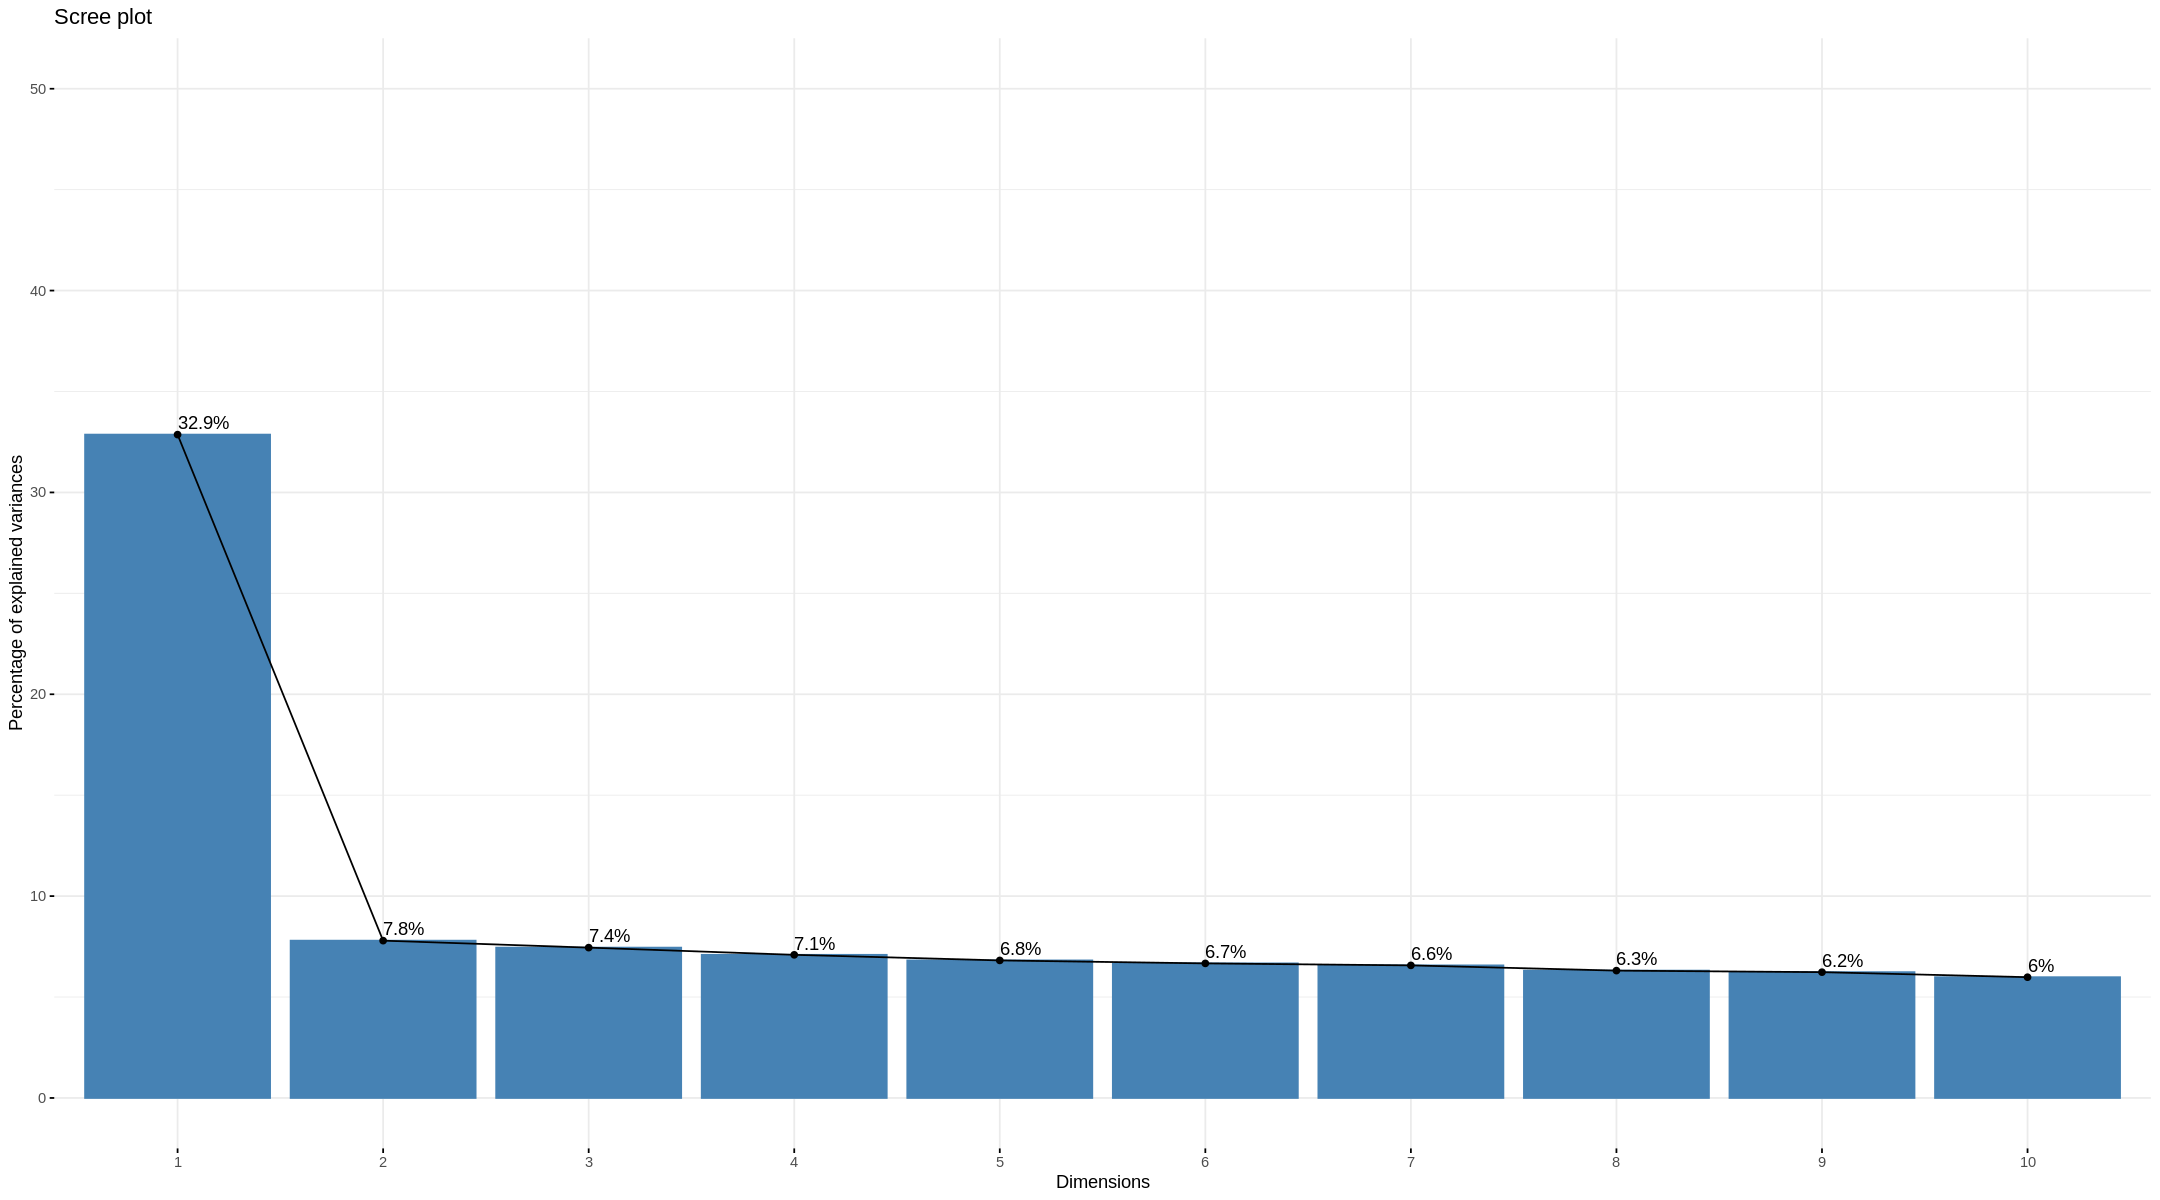

In [ ]:
# extracting the most important features
library(factoextra)
library(FactoMineR)
res.pca <- PCA(sol,  graph = FALSE)
# visualize eigenvalues/variances
fviz_screeplot(res.pca, addlabels = TRUE, ylim = c(0, 50))

We observe that the first pca has 32.9% of the total variance this is alot. With 10 pca's we have a tota of 93.8%. This is very inclusive thus the other 6 contribute a very small percentage.

In [ ]:
# install the farver package which eliminates the color decoding error.
install.packages("farver")
require(farver)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: farver



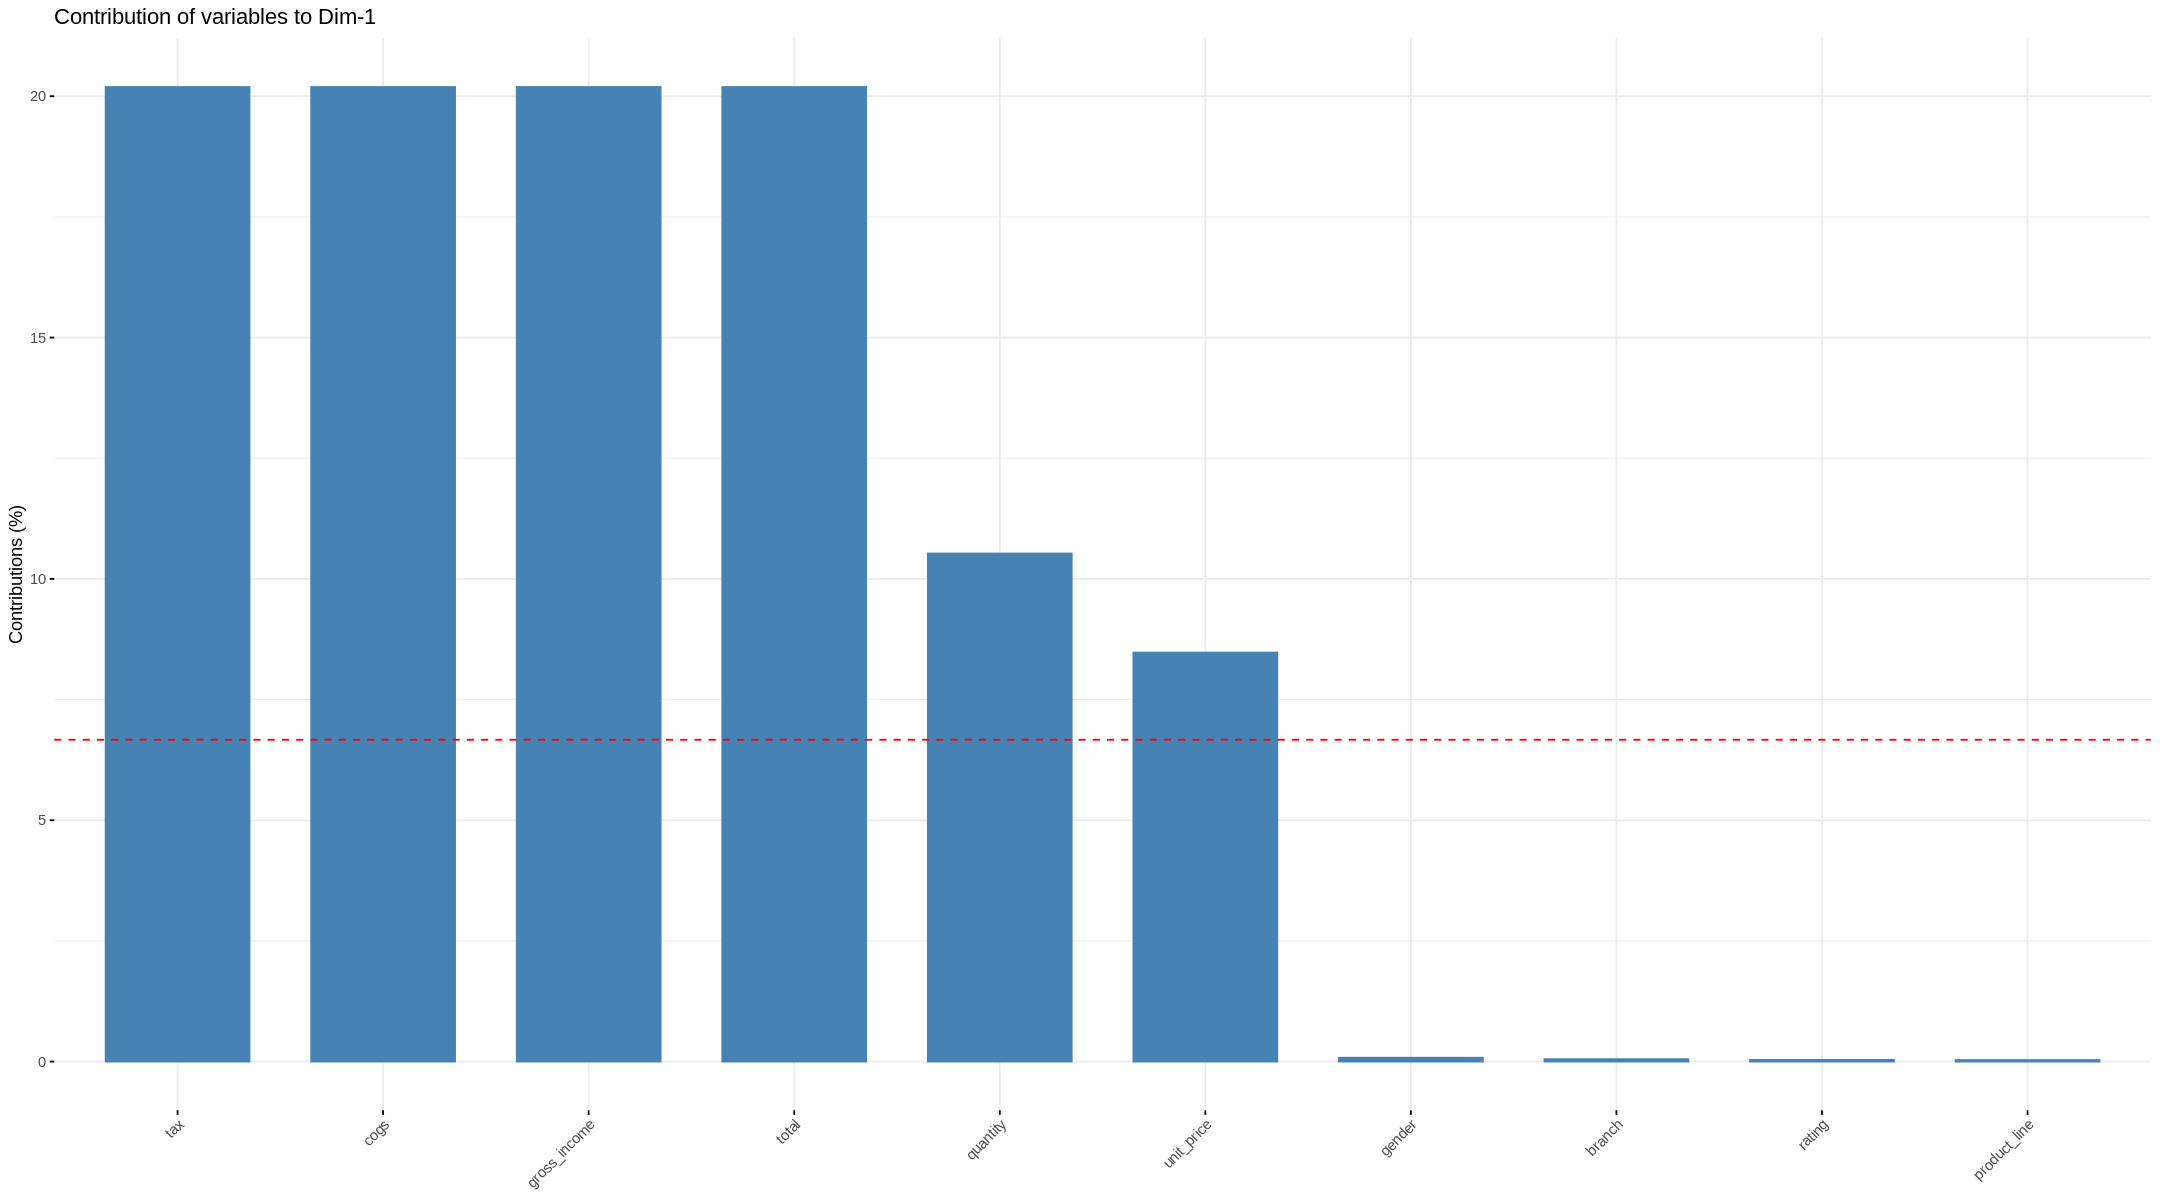

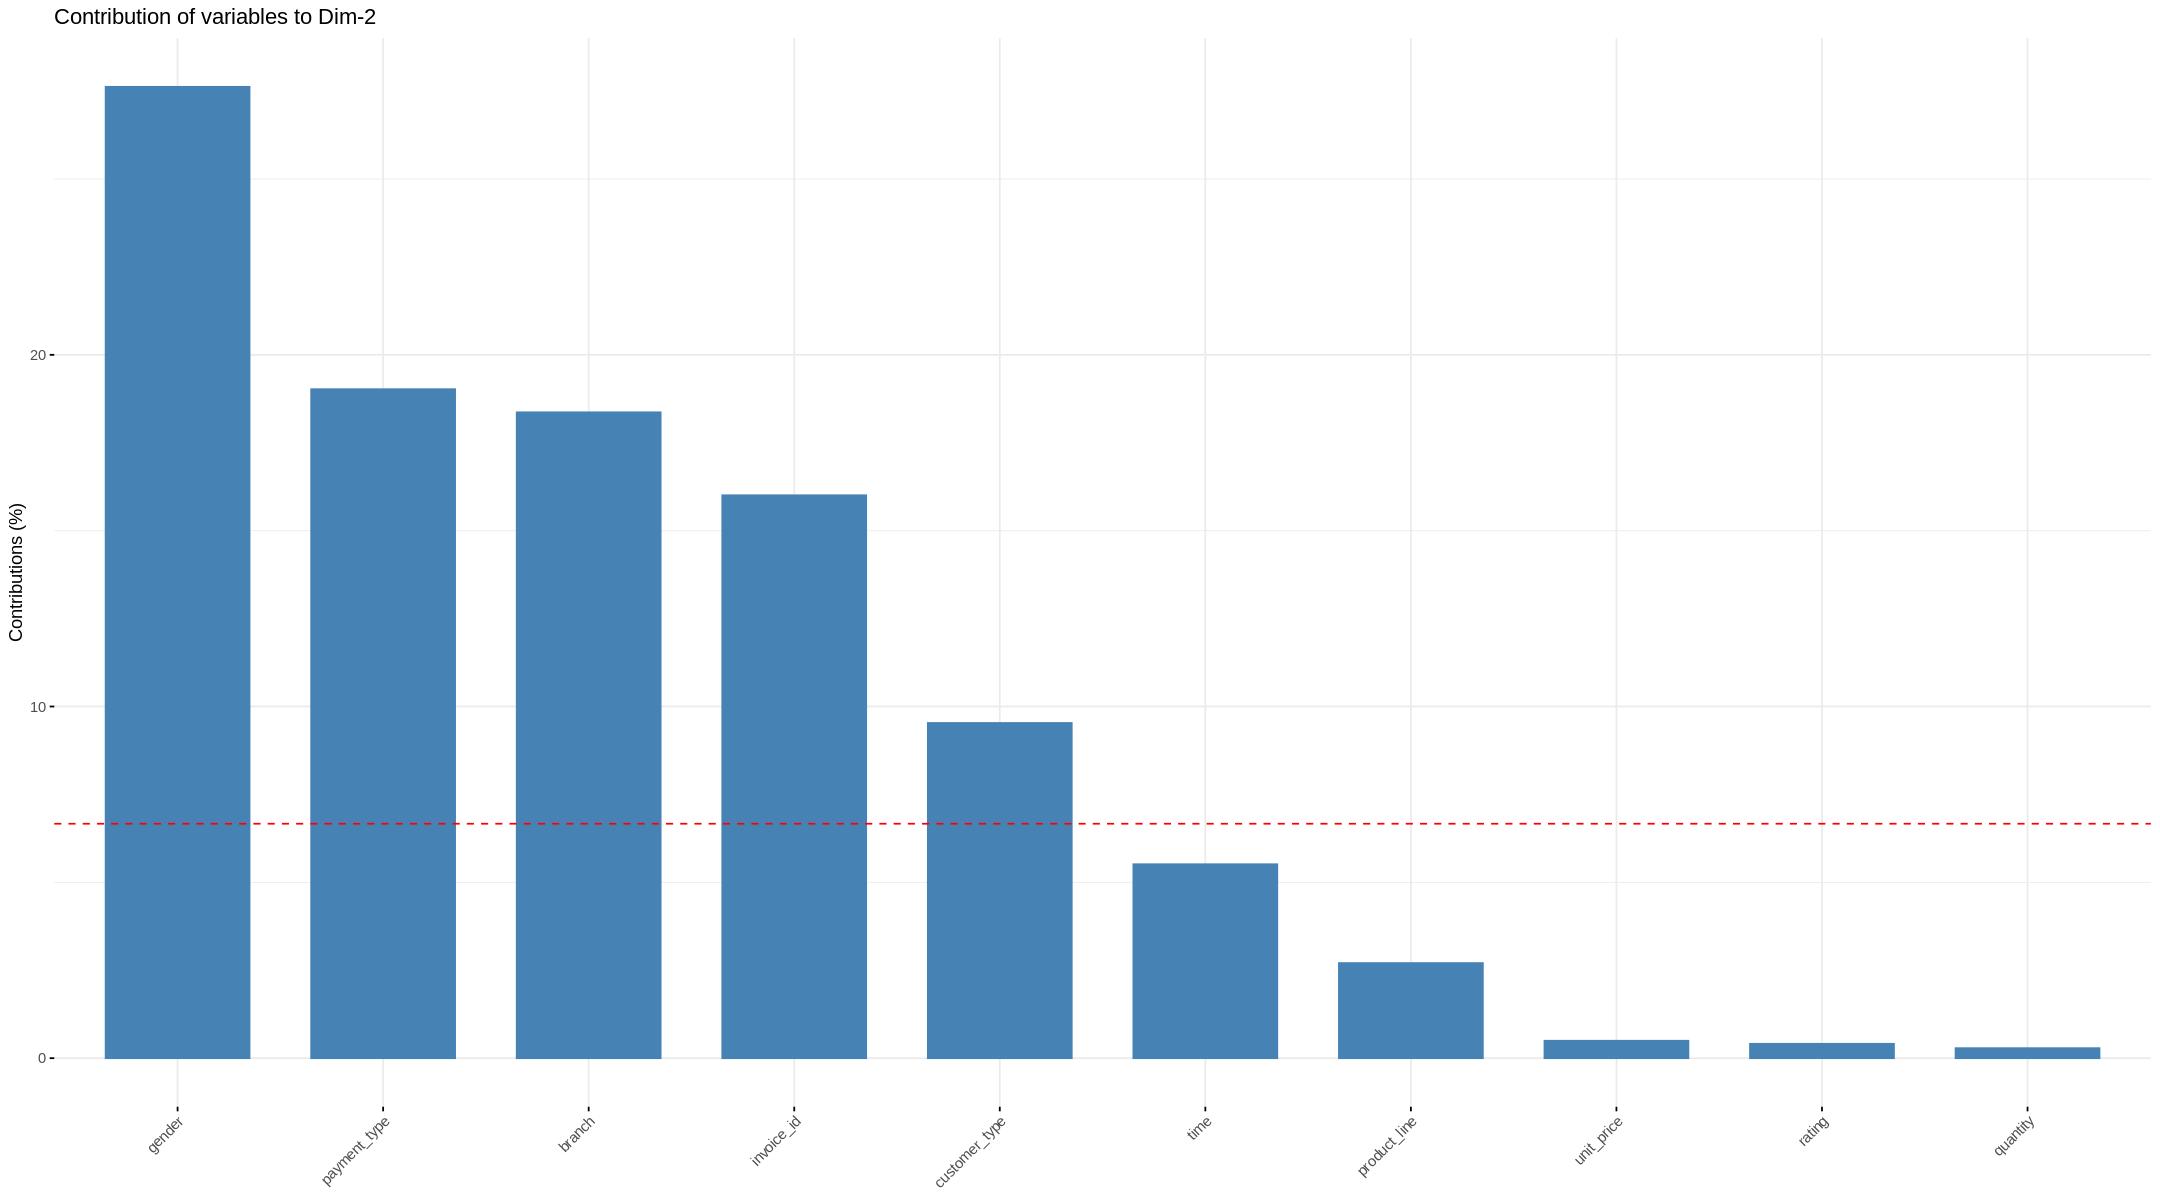

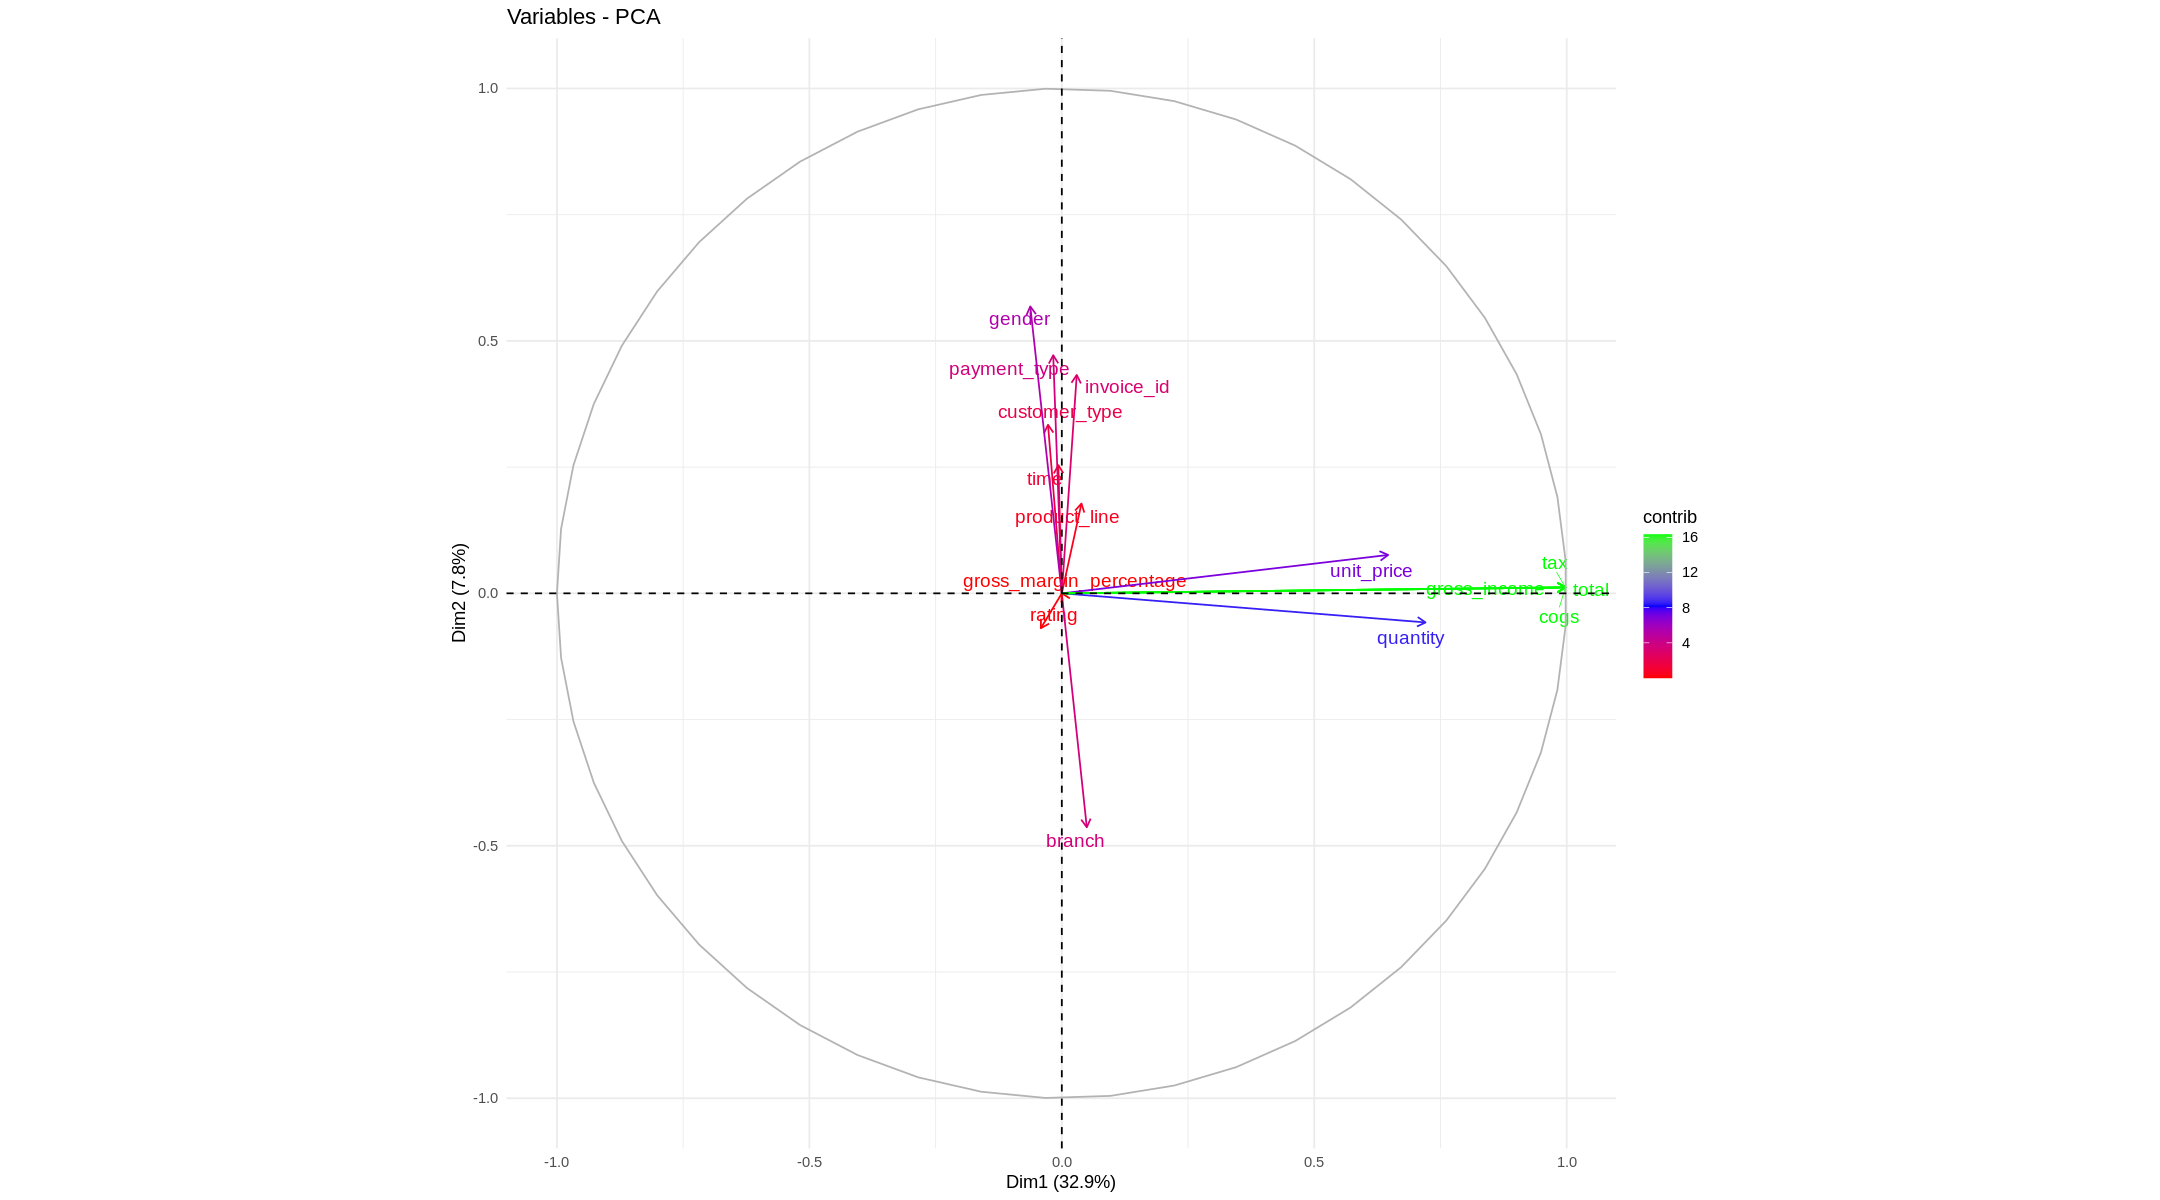

In [ ]:
# Extract the results for variables
var <- get_pca_var(res.pca)# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)# Control variable colors using their contributions to the principle axis
fviz_pca_var(res.pca, col.var="contrib",
             gradient.cols = c("red", "blue", "green"),
             repel = TRUE) + theme_minimal() + ggtitle("Variables - PCA")

# below we can see the 10 features with highest contribution

We observe that the most important contributors are tax, cogs, gross_income, total, quantity and unit price in the first dim. 
For the second dim the most important contributors are gender, payment_type, branch, invoice_id, customer_type, time and product_line.

The most important contributions from the circle graph is tax and cogs. Followed by Unit price and quantity. We do observe that tax and cogs are inversely propotional as is unit price and quantity.

## 6. Feature selection.

In [ ]:
# make a copy of sol
fear <- cbind(sol)
dim(fear)

[1] 1000   15

In [ ]:
str(fear)

'data.frame':	1000 obs. of  15 variables:
 $ invoice_id             : num  -0.186 -0.858 -0.347 -0.982 -0.661 -0.267 -0.685 -0.736 -0.298 -0.274 ...
 $ branch                 : num  -1 -0.333 -1 -1 -1 ...
 $ customer_type          : num  -1 -0.5 -0.5 -1 -0.5 -0.5 -1 -0.5 -1 -1 ...
 $ gender                 : num  -1 -1 -0.5 -0.5 -0.5 -0.5 -1 -1 -1 -1 ...
 $ product_line           : num  -0.5 -1 -0.333 -0.5 -0.167 ...
 $ unit_price             : num  -9.43 -10.03 -9.72 -9.6 -9.32 ...
 $ quantity               : num  -0.4 -0.6 -0.4 -0.3 -0.4 -0.4 -0.5 -0.1 -0.9 -0.8 ...
 $ tax                    : num  0.00777 -0.4418 -0.19215 -0.0497 0.08969 ...
 $ time                   : num  -0.7115 -0.9545 -0.6937 -0.0415 -0.9427 ...
 $ payment_type           : num  -0.333 -1 -0.667 -0.333 -0.333 ...
 $ cogs                   : num  -9.65 -10.1 -9.85 -9.71 -9.57 ...
 $ gross_margin_percentage: num  -4.76 -4.76 -4.76 -4.76 -4.76 ...
 $ gross_income           : num  0.00777 -0.4418 -0.19215 -0.0497 0.

### Filter method

In [ ]:
fear = subset(fear, select = -c(gross_margin_percentage) )
correlationMatrix <- cor(fear)
highcorr <- findCorrelation(correlationMatrix, cutoff=0.75)
names(fear[,highcorr])

[1] "cogs"         "tax"          "gross_income"

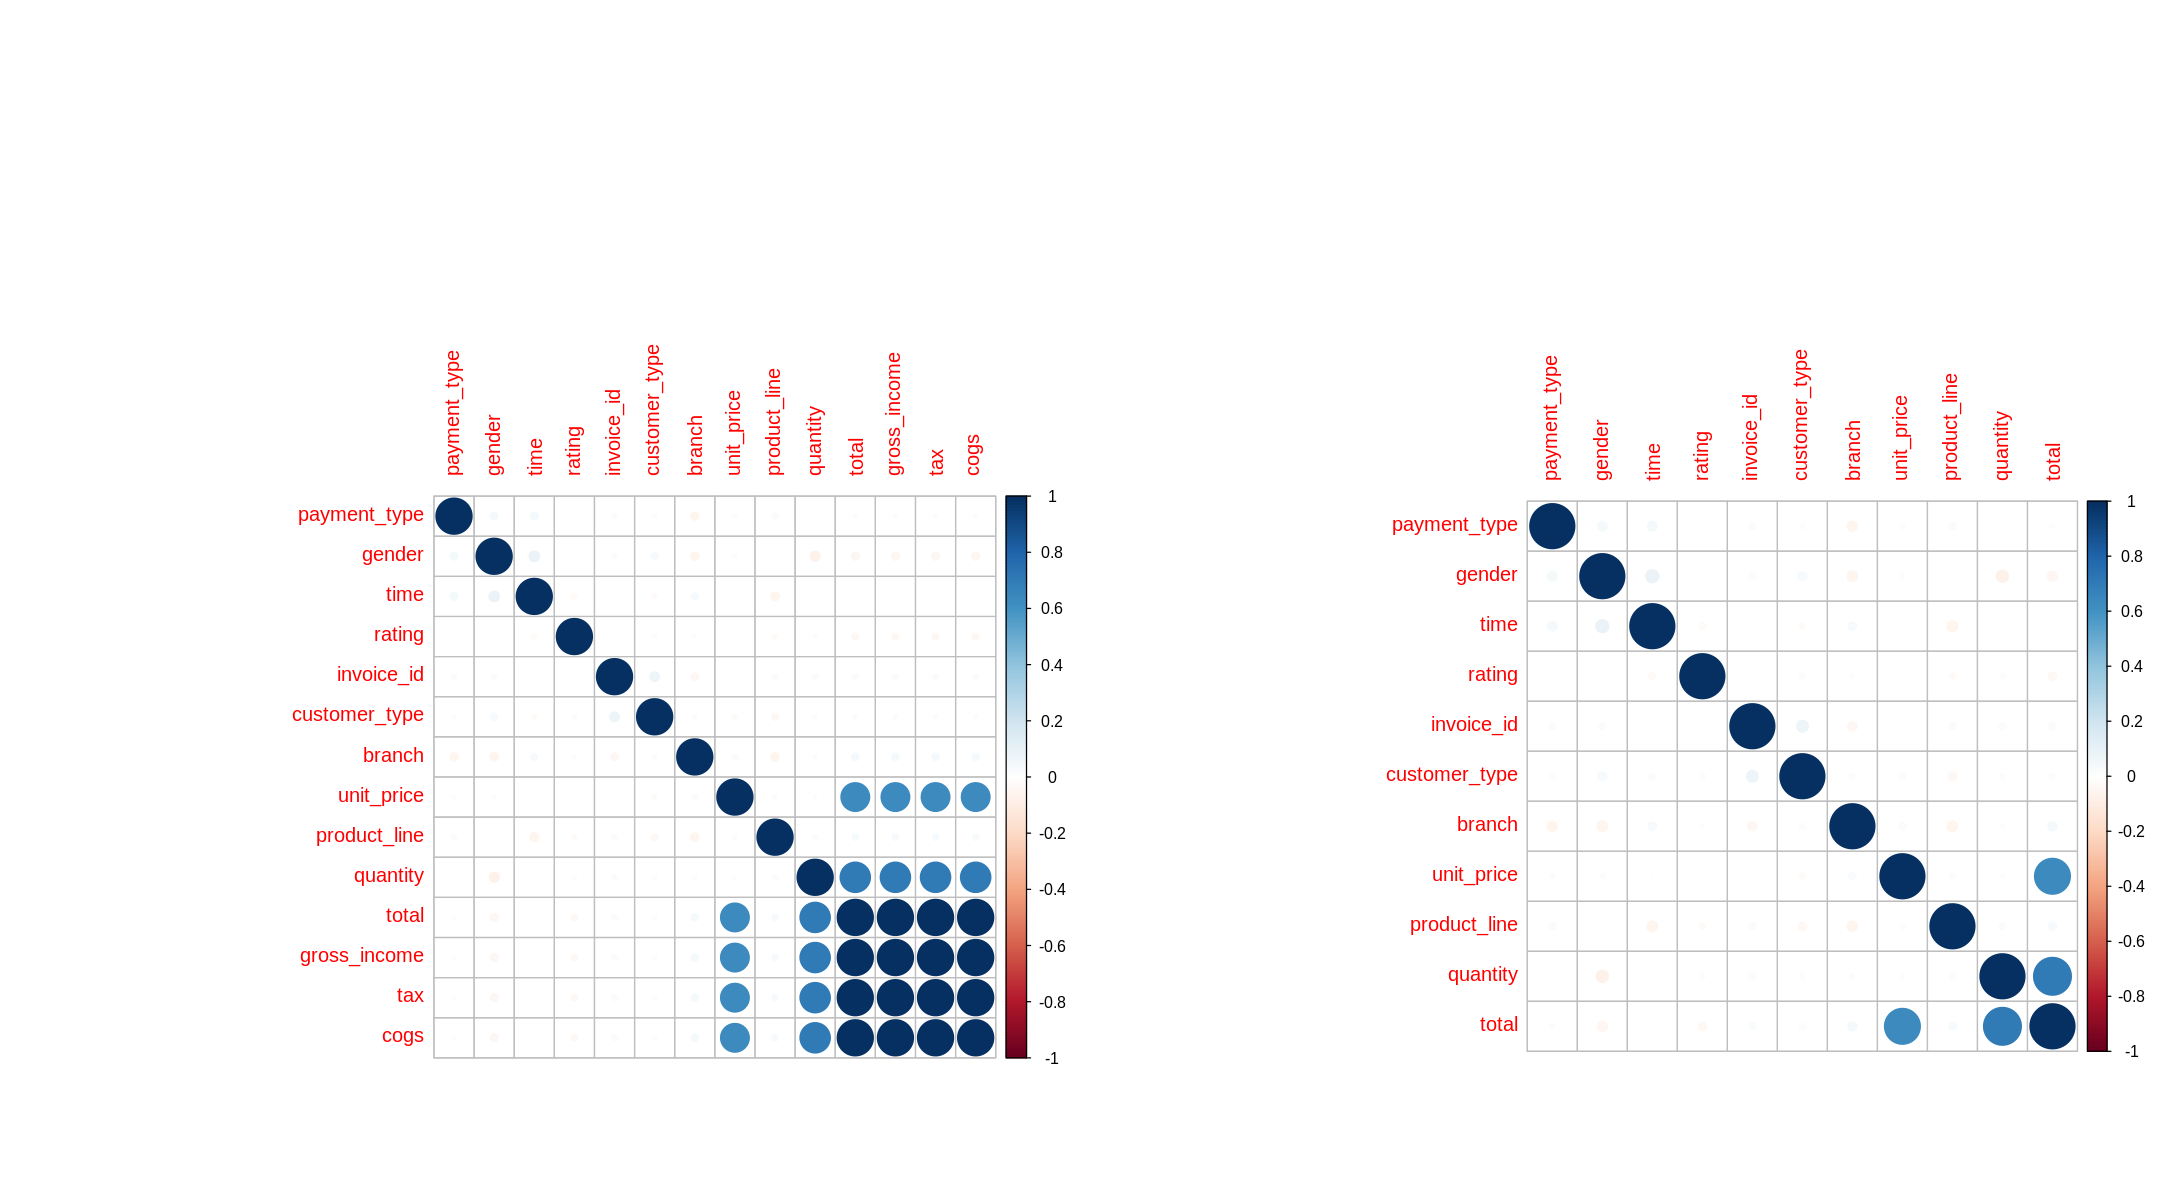

In [ ]:
fea <- fear[-highcorr]

# Performing our graphical comparison
# ---
# 
par(mfrow = c(1, 2))
corrplot(correlationMatrix, order = "hclust")
corrplot(cor(fea), order = "hclust")

Most important features here is unit price, quantity and total.

### Feature ranking method

In [ ]:
# install Fselector
suppressWarnings(
        suppressMessages(if
                         (!require(FSelector, quietly=TRUE))
                install.packages("FSelector")))
library(FSelector)

In [ ]:
# compute the importance scores
Scores <- linear.correlation(fear)
Scores

,attr_importance
,<dbl>
branch,0.041752805
customer_type,0.070518893
gender,0.023552486
product_line,0.027588706
unit_price,0.009212911
quantity,0.024976905
tax,0.027277163
time,0.009223579
payment_type,0.021477984


In [ ]:
# pick 8 of the most important features
Subset <- cutoff.k(Scores, 8)
as.data.frame(Subset)

Subset
<fct>
customer_type
branch
product_line
cogs
tax
gross_income
total
quantity


Above we can see that total, quantity, and total have been picked as was in previous cases. 

## 7. Conclusion.

**Dimension Reduction**

We oberved that tax, cogs, gross_income, total, quantity and unit price had the most contribution of variance to the dataset. It would be worth noting that the above mentioned variables would best be suited for modelling.

**Feature selection**

We observed that total, quantity, and total appeared in both the pca and feature selection techniques thus we note that they are required. 

## 8. Recommendations.

We recommend the following:
1. Perform feature selection without normalizing the data and find out if the resuts would be different. 
2. For modelling either of the variables from PCA and Feature selection could be used.
3. Identify a dependent variable.

## 9. Follow up questions

Did we have the right data? **Yes**